In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [2]:
#Load the dataset 
data= pd.read_csv("E:/NorthEastern University/Predictive Analytics/M6- Final Report/income_evaluation - Copy.csv")

#Success- Display the the first ten records 
display(data.head(n=3))


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


# I/ Exploratory Data Analysis(EDA) and data preparation 

In [3]:
# Total number of records
n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income'] == ' >50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income'] == ' <=50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent =  round(((n_greater_50k /  n_records) * 100),3)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 30162
Individuals making more than $50,000: 7508
Individuals making at most $50,000: 22654
Percentage of individuals making more than $50,000: 24.892%


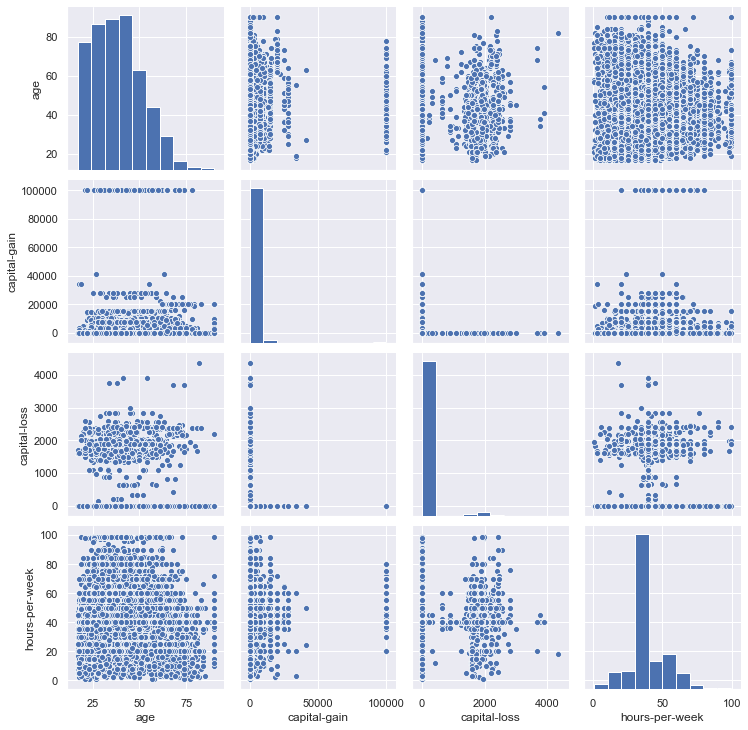

In [4]:
# useful views of data
sns.set()
sns.pairplot(data[['age', 'workclass','education', 'marital-status', 'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week']])

C:\Users\HP\Z. Testing and Learning\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


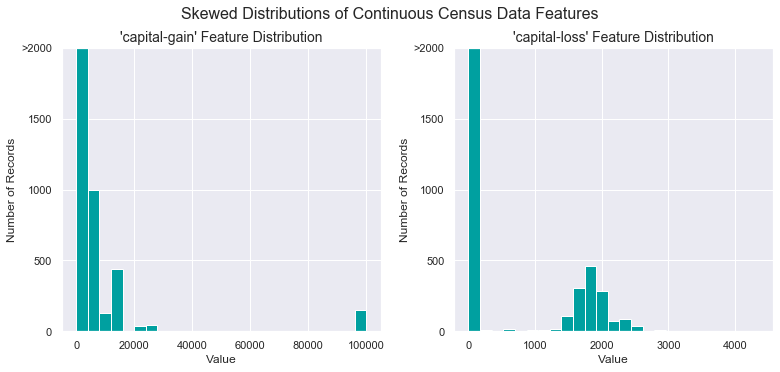

In [5]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

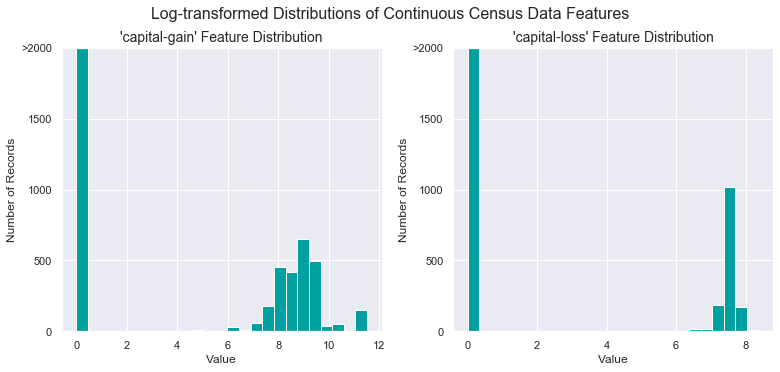

In [6]:
#log- transform the skewed features 
skewed= ['capital-gain', 'capital-loss']
features_log_transformed= pd.DataFrame(data=features_raw)
features_log_transformed[skewed]= features_raw[skewed].apply(lambda x: np.log(x+1))

#Visualize the new log distributions 
vs.distribution(features_log_transformed, transformed = True)


Normalizing Numerical features

In [7]:
#Import sklearn.preprocessing.StandardScaler 
from sklearn. preprocessing import MinMaxScaler 

#initialize a scaler, then apply it to the features
scaler =MinMaxScaler()               #default=0,1
numerical= ['age','education-num','capital-gain','capital-loss','hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

#Show an example of a record with scalling applied 
display(features_log_minmax_transform.head(n=3))

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States


Preprocessing categorical features 

In [8]:
features_log_minmax_transform.head(1)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States


In [9]:
# One-hot encode the 'features_log_minmax_transform' data 
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'income_raw' data to numerical values
income = income_raw.map({' <=50K':0,' >50K':1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# See the encoded feature names
print (encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-manageri

Split Data

In [10]:
#Import train test split 
from sklearn.model_selection import train_test_split 

#Spite the 'features' and 'income' data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(features_final,income,test_size = 0.2, random_state = 0) 

#Show the results of the split 
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 24129 samples.
Testing set has 6033 samples.


# II/ Building the Predictive models 

1. KNN

In [11]:
#Fitting Classifier to the Training Set 
from sklearn.neighbors import KNeighborsClassifier
classifier_1= KNeighborsClassifier(n_neighbors=5, metric= 'minkowski',)
                            #n_neighbors: number of neightrs to use by default of k queries 
                            #metric: need to pick 'minkowski' first to use the Eucledian distance 
                            #p= need to be 2 to use the Eucledian
classifier_1.fit(X_train,y_train)

#Predicting the Test Set Result 
y_pred1 = classifier_1.predict(X_test)

#Making the Confusion Matrix 
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)

[[4069  463]
 [ 642  859]]


In [12]:
# Specific to the figures
TP_1 = int(cm1[0,0])
FP_1 = int(cm1[1,0])
FN_1 = int(cm1[0,1])
TN_1 = int(cm1[1,1])


# Calculate accuracy, precision and recall
accuracy_1 = (TP_1+ TN_1)/ (TP_1 + FP_1 + TN_1 + FN_1)
precision_1 = TP_1 / (TP_1 + FP_1)
recall_1 = TP_1 / (TP_1 + FN_1)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall
fscore_1 = (1 + 0.5**2) * ((precision_1 * recall_1) / ((0.5**2) * precision_1 + recall_1))

# Print the results 
print("KNN: [Accuracy : {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F-score: {:.4f}]".format(accuracy_1,precision_1, recall_1,fscore_1))

KNN: [Accuracy : 0.8168, Precision: 0.8637, Recall: 0.8978, F-score: 0.8703]


 2. GAUSSIAN NAÏVE BAYES

In [13]:
#Fitting Classifier to the Training Set 
from sklearn.naive_bayes import GaussianNB
classifier_2= GaussianNB()
                            #No arguments here 
classifier_2.fit(X_train,y_train)


#Predicting the Test Set Result 
y_pred2 = classifier_2.predict(X_test)

#Making the Confusion Matrix 
cm2 = confusion_matrix(y_test,y_pred2)
print(cm2)


[[1174 3358]
 [  52 1449]]


In [14]:
# Specific to the figures
TP_2 = int(cm2[0,0])
FP_2 = int(cm2[1,0])
FN_2 = int(cm2[0,1])
TN_2 = int(cm2[1,1])


# Calculate accuracy, precision and recall
accuracy_2 = (TP_2+ TN_2)/ (TP_2 + FP_2 + TN_2 + FN_2)
precision_2 = TP_2 / (TP_2 + FP_2)
recall_2 = TP_2 / (TP_2 + FN_2)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall
fscore_2 = (1 + 0.5**2) * ((precision_2 * recall_2) / ((0.5**2) * precision_2 + recall_2))

# Print the results 
print("Bayes: [Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F-score: {:.4f}]".format(accuracy_2,precision_2, recall_2,fscore_2))

Bayes: [Accuracy: 0.4348, Precision: 0.9576, Recall: 0.2590, F-score: 0.6221]


3. DECISION TREE AND RULES

In [15]:
#Fitting Classifier to the Training Set 
from sklearn.tree import DecisionTreeClassifier
classifier_3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
                        #Criterion: the function to measure the quality of a split Suppoed criteria are gi, for the gini impurity and entropy for the information again. We it gets to the end, we will have the homoginy group 
                        #if the childnote=0, then it is a fully homogeneous groups of users 
classifier_3.fit(X_train, y_train)


#Predicting the Test Set Result 
y_pred3 = classifier_3.predict(X_test)

#Making the Confusion Matrix 
cm3 = confusion_matrix(y_test,y_pred3)
print(cm3)

[[4004  528]
 [ 583  918]]


In [16]:
# Specific to the figures
TP_3 = int(cm3[0,0])
FP_3 = int(cm3[1,0])
FN_3 = int(cm3[0,1])
TN_3 = int(cm3[1,1])


# Calculate accuracy, precision and recall
accuracy_3 = (TP_3+ TN_3)/ (TP_3 + FP_3 + TN_3 + FN_3)
precision_3 = TP_3 / (TP_3 + FP_3)
recall_3 = TP_3 / (TP_3 + FN_3)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall
fscore_3 = (1 + 0.5**2) * ((precision_3 * recall_3) / ((0.5**2) * precision_3 + recall_3))

# Print the results 
print("Decision Tree: [Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F-score: {:.4f}]".format(accuracy_3,precision_3, recall_3,fscore_3))

Decision Tree: [Accuracy: 0.8158, Precision: 0.8729, Recall: 0.8835, F-score: 0.8750]


[Text(159.23122520717448, 215.34923076923076, 'X[30] <= 0.5\nentropy = 0.81\nsamples = 24129\nvalue = [18122, 6007]'),
 Text(60.33904242009309, 211.1676923076923, 'X[2] <= 0.777\nentropy = 0.364\nsamples = 12911\nvalue = [12014, 897]'),
 Text(41.049890603248926, 206.98615384615385, 'X[1] <= 0.767\nentropy = 0.297\nsamples = 12677\nvalue = [12010, 667]'),
 Text(23.276485255799013, 202.80461538461537, 'X[4] <= 0.403\nentropy = 0.174\nsamples = 10101\nvalue = [9838, 263]'),
 Text(11.768274089673707, 198.62307692307692, 'X[0] <= 0.212\nentropy = 0.109\nsamples = 8176\nvalue = [8058, 118]'),
 Text(1.7299590538011638, 194.44153846153847, 'X[0] <= 0.062\nentropy = 0.034\nsamples = 4515\nvalue = [4499, 16]'),
 Text(1.5842782913758024, 190.26, 'entropy = 0.0\nsamples = 1863\nvalue = [1863, 0]'),
 Text(1.8756398162265249, 190.26, 'X[29] <= 0.5\nentropy = 0.053\nsamples = 2652\nvalue = [2636, 16]'),
 Text(1.2018662900092296, 186.07846153846154, 'X[1] <= 0.567\nentropy = 0.048\nsamples = 2649\nval

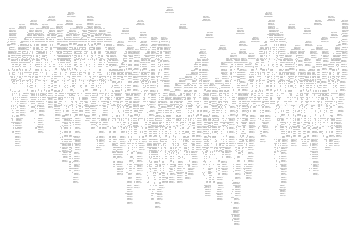

In [17]:
#Paint the decision Tree 
from sklearn import tree

tree.plot_tree(classifier_3)

4. RANDOM FORESTS

In [27]:
#Fitting Classifier to the Training Set 
from sklearn.ensemble import RandomForestClassifier
classifier_4 = RandomForestClassifier(n_estimators= 30,
                                   criterion='entropy',
                                   random_state=0)
                    #n_estimators: decide to go with 30 
                    #The difference between the entropy of the parent node minus the entropy of the cild node 
classifier_4.fit(X_train, y_train)


#Predicting the Test Set Result 
y_pred4 = classifier_4.predict(X_test)

#Making the Confusion Matrix 
cm4 = confusion_matrix(y_test,y_pred4)
print(cm4)

[[4136  396]
 [ 580  921]]


In [28]:
# Specific to the figures
TP_4 = int(cm4[0,0])
FP_4 = int(cm4[1,0])
FN_4 = int(cm4[0,1])
TN_4 = int(cm4[1,1])


# Calculate accuracy, precision and recall
accuracy_4 = (TP_4+ TN_4)/ (TP_4 + FP_4 + TN_4 + FN_4)
precision_4 = TP_4 / (TP_4 + FP_4)
recall_4 = TP_4 / (TP_4 + FN_4)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall
fscore_4 = (1 + 0.5**2) * ((precision_4 * recall_4) / ((0.5**2) * precision_4 + recall_4))

# Print the results 
print("Random Forest: [Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F-score: {:.4f}]".format(accuracy_4,precision_4, recall_4,fscore_4))

Random Forest: [Accuracy: 0.8382, Precision: 0.8770, Recall: 0.9126, F-score: 0.8839]


5. GLM & LOGISTIC REGRESSION. 

In [29]:
#Fitting Logistic Regression to the Training Set 
from sklearn.linear_model import LogisticRegression 
classifier_5 = LogisticRegression(random_state =0 )
                        #RandomState so that we can have the same result  
classifier_5.fit(X_train, y_train)


#Predicting the Test Set Result 
y_pred5 = classifier_5.predict(X_test)

#Making the Confusion Matrix 
cm5 = confusion_matrix(y_test,y_pred5)
print(cm5)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4170  362]
 [ 610  891]]


In [30]:
# Specific to the figures
TP_5 = int(cm5[0,0])
FP_5 = int(cm5[1,0])
FN_5 = int(cm5[0,1])
TN_5 = int(cm5[1,1])


# Calculate accuracy, precision and recall
accuracy_5 = (TP_5+ TN_5)/ (TP_5 + FP_5 + TN_5 + FN_5)
precision_5 = TP_5 / (TP_5 + FP_5)
recall_5 = TP_5 / (TP_5 + FN_5)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall
fscore_5 = (1 + 0.5**2) * ((precision_5 * recall_5) / ((0.5**2) * precision_5 + recall_5))

# Print the results 
print("GLM Logistic Regression: [Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F-score: {:.4f}]".format(accuracy_5,precision_5, recall_5,fscore_5))

GLM Logistic Regression: [Accuracy: 0.8389, Precision: 0.8724, Recall: 0.9201, F-score: 0.8815]


# III/ Predictive models comparison and model optimization 

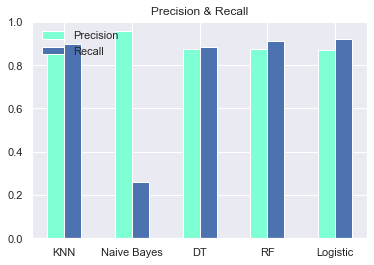

In [31]:
#Create Comparision plot 
accuracy_t =[accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5]
precision_t = [precision_1,precision_2, precision_3, precision_4, precision_5]
recall_t = [recall_1,recall_2,recall_3,recall_4,recall_5]
fscore_t = [fscore_1,fscore_2,fscore_3,fscore_4,fscore_5]
model_labels = ['KNN', 'Naive Bayes', 'DT', 'RF', 'Logistic']


ind = np.arange(5) 
plt.bar(ind, precision_t, 0.25, label='Precision', color='aquamarine')
plt.bar(ind + 0.25, recall_t, 0.25, label='Recall')
plt.xticks(ind + 0.25 / 2, model_labels)
plt.title('Precision & Recall')
plt.legend(loc='upper left')

plt.show()

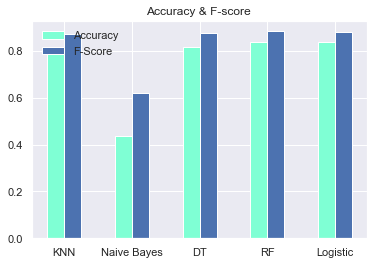

In [32]:
plt.bar(ind, accuracy_t, 0.25, label='Accuracy', color='aquamarine')
plt.bar(ind + 0.25, fscore_t, 0.25, label='F-Score')
plt.xticks(ind + 0.25 / 2, model_labels)
plt.title('Accuracy & F-score ')
plt.legend(loc='upper left')
plt.show()

Random Forest and Logistic Regression are the two best models for our analysis because they have nearly identical metrics score. We will:
       #Improve the models through Feature selections,
       #Apply the K-Fold Cross Validation with different parameters
       #Apply Grid Search to find the best model and best parameters 

FEATURE SELECTION

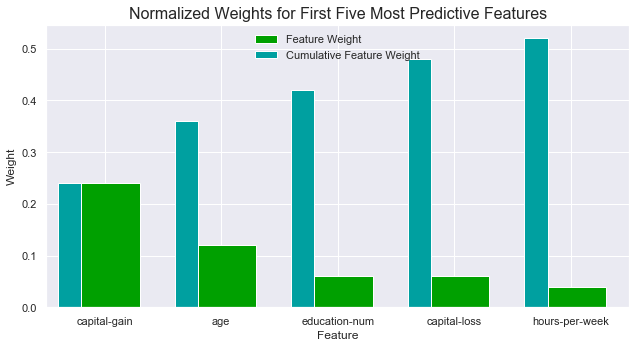

In [33]:
# Import Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier

# Train the supervised model on the training 
model = AdaBoostClassifier().fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [34]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

In [35]:
#Random Forest

# Train on the Random Forest model we created before
clf_a = classifier_4.fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions_a = clf_a.predict(X_test_reduced)

#Accuracy and F-score of the Random forest
cm_a = confusion_matrix(y_test,reduced_predictions_a)
TP_a = int(cm_a[0,0])
FP_a = int(cm_a[1,0])
FN_a = int(cm_a[0,1])
TN_a = int(cm_a[1,1])
accuracy_a = (TP_a+ TN_a)/ (TP_a + FP_a + TN_a + FN_a)
precision_a = TP_a / (TP_a + FP_a)
recall_a = TP_a / (TP_a + FN_a)
fscore_a = (1 + 0.5**2) * ((precision_a * recall_a) / ((0.5**2) * precision_a + recall_a))


# Report scores from the final model using both versions of data
print("Model trained on full data- Random Forest\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_4))
print("F-score on testing data: {:.4f}".format(fscore_4))
print("\n Model trained on reduced data- Random Forest\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_a))
print("F-score on testing data: {:.4f}".format(fscore_a))

Model trained on full data- Random Forest
------
Accuracy on testing data: 0.8382
F-score on testing data: 0.8839

 Model trained on reduced data- Random Forest
------
Accuracy on testing data: 0.8081
F-score on testing data: 0.8540


In [36]:
#Logistic Regression

# Train on the Random Forest model we created before
clf_b = classifier_5.fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions_b = clf_b.predict(X_test_reduced)

#Accuracy and F-score of the Random forest
cm_b = confusion_matrix(y_test,reduced_predictions_b)
TP_b = int(cm_a[0,0])
FP_b = int(cm_a[1,0])
FN_b = int(cm_a[0,1])
TN_b = int(cm_a[1,1])
accuracy_b = (TP_b+ TN_b)/ (TP_b + FP_b + TN_b + FN_b)
precision_b = TP_b / (TP_b + FP_b)
recall_b = TP_b / (TP_b + FN_b)
fscore_b = (1 + 0.5**2) * ((precision_b * recall_b) / ((0.5**2) * precision_b + recall_b))


# Report scores from the final model using both versions of data
print("Model trained on full data- Logistic Regression\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_5))
print("F-score on testing data: {:.4f}".format(fscore_5))
print("\n Model trained on reduced data- Logistic Reression\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_b))
print("F-score on testing data: {:.4f}".format(fscore_b))

Model trained on full data- Logistic Regression
------
Accuracy on testing data: 0.8389
F-score on testing data: 0.8815

 Model trained on reduced data- Logistic Reression
------
Accuracy on testing data: 0.8081
F-score on testing data: 0.8540


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy and f-score of both models are lower on the reduced data than on the original dataset. Thus the best option would be to use the defualt model version with the complete dataset as it yileds a good combination of accuracy and F-score. 

K-FOLD CROSS VALIDATION

In [36]:
#Random Forest's Cross Validation 
from sklearn.model_selection import cross_val_score
accuracies_a = cross_val_score(estimator = classifier_4, X = X_train, y = y_train, cv = 10)
                            #estimator: estimator object implementing 'fit'. The object that u use to fit the model. we called 'classifier' above 
                            #cv:the number of folds u want to split teh training set into. Most common is 10
                            #We can check the accurracies here if we want.
#Now we take the mean and std of the accuracies then we can know how well the model perform 
a1= accuracies_a.mean()
a2= accuracies_a.std()
print('Accuracies of the RF folds are: ',accuracies_a)
print('Mean of the RD accuracies is: ',round(a1,3))
print('STD of the RD accuracies is: ',round(a2,3))

Accuracies of the RF folds are:  [0.82767191 0.83844242 0.84459179 0.83630336 0.84749275 0.84707833
 0.84210526 0.85862355 0.8354063  0.83499171]
Mean of the RD accuracies is:  0.841
STD of the RD accuracies is:  0.008


In [39]:
#Random Forest's Cross Validation 
accuracies_b = cross_val_score(estimator = classifier_5, X = X_train, y = y_train, cv = 10)
b1= accuracies_b.mean()
b2= accuracies_b.std()
print('Accuracies of the LogisticR folds are: ',accuracies_b)
print('Mean of the LogisticR accuracies is: ',round(b1,3))
print('STD of the LogisticR accuracies is: ',round(b2,3))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

Accuracies of the LogisticR folds are:  [0.82601491 0.84589892 0.85205139 0.83215914 0.84583506 0.84334853
 0.84376295 0.84577114 0.83913765 0.84038143]
Mean of the LogisticR accuracies is:  0.841
STD of the LogisticR accuracies is:  0.007


GRID SEARCH

In [41]:
#Appplying the Grid search to find the best model and best parameters for Random Forest 
from sklearn.model_selection import GridSearchCV
parameters_4 = [{'n_estimators': [10, 30, 100, 300], 'criterion': ['entropy','gini']}]                    
                    #Find the parameters (key identifiers) that we can optimize 
                    #Input a list of dictionaries, then we have key identifiers that weill be tested with the grid serach model and the grid search model will find the best one 
grid_search_4 = GridSearchCV(estimator = classifier_4,
                           param_grid = parameters_4,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
                    #estimator: our machine learning model- 'classifier' in this case
                    #param_gid: 'parameters' are teh thigns we try to compare 
                    #scoring: the metrics, it can be anything - accuracy, precision,recall,etc.Accuracy is the most common one 
                    #cv: the k in kfold cross validation, the true grid will evalute the accuracy on each of fold 
                    #n_jobs=-1: in case we will use this on the big dataset  
grid_search_4 = grid_search_4.fit(X_train, y_train)
best_accuracy_4 = grid_search_4.best_score_
best_parameters_4 = grid_search_4.best_params_

print('Best Accuracies of Grid Search for RF: ',best_accuracy_4)
print('Best Parameters of Grid Search for RF: ',best_parameters_4)

Best Accuracies of Grid Search for RF:  0.8440465829499773
Best Parameters of Grid Search for RF:  {'criterion': 'entropy', 'n_estimators': 300}


After applying the K-Fold cross validation, we saw that mean and std of accuraries between these two models identical.So we decided to apply the Grid Search for the Random Forest model. Finally, we saw the the best accuracies out of all the models we have is 0.844 when the Random Forest Model has the criterion = 'entropy' and n_estimator = '300'